<a href="https://www.kaggle.com/code/bobaktech/hotel-booking-dataset-practices?scriptVersionId=104588172" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
> The hotel-booking dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled. <br>
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

In this notebook, I have done some exercises with this dataset given from [Filoger](filoger.com)'s AI Bootcamp which I had signed up before. <br>
Some plots are displayed using Seaborn library, also.

# Dataset's Content
> Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted.
Four Columns, 'name', 'email', 'phone number' and 'credit_card' have been artificially created and added to the dataset.

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Q1 - Reading the dataset's CSV file

In [2]:
df = pd.read_csv("../input/hotel-booking/hotel_booking.csv");

By using Pandas library and read_csv() function, the dataset's csv file is called and added as a dataframe into a variable named 'df'.

# Q2 - Dataset's Base information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The info() function displays the base informations of the dataframe which contains type of the dataframe, total number of records and range of indexes, columns name, total number of not null (non-null) values and types of columns and the memory usage of the dataframe.


# Q3 - Dataset's number of rows

In [4]:
pd.DataFrame([df.shape],columns=['number_of_rows','number_of_columns'],index=['0'])

,number_of_rows,number_of_columns
0,119390,36


The shape attribute represents the total number of columns and rows as a tuple. <br>
I decided to show them as tabular data, so I putted them in a dataframe function.

# Q4 - Does the dataset have any missing data? If the answer is positive, which column have the most missing data?
> Solution source: [yun.ir/dxig38](yun.ir/dxig38)

In [5]:
# Q4-1 - Checking missing data
checkMD = df.isnull().values.any();

# Q4-2 - The column with most missing data
columnMD = df.isnull().sum().idxmax();

# Get the output
pd.DataFrame({
    'check_missing_data_existance': checkMD,
    'column_with_maximum_missing_data': columnMD.upper()
},index=['0'])

,check_missing_data_existance,column_with_maximum_missing_data
0,True,COMPANY


For checking the existance of missing data in any record, I used the 'isnull()' function. The result will show "NaN" (Not a number). To present the result as boolean, the 'values' attribute is added. <br>
Now, we had found the records with missing data. There are several records founded whereas only one is enough to check for the existance. In this case, I used the 'any()' function to say if there is atleast one missing data, return true, else return false. At last, the result is stored in 'checkMD' variable.

To find the column with the most missing data, I used the 'isnull()' again but this time, I summed the missing data exist in a column using 'sum()' function. To show the column name which have the most missing data, I used the 'idxmax()' function.

To visualize the total missing data of each column, expand the cell below. (Source: [yun.ir/h4j3m6](yun.ir/h4j3m6))

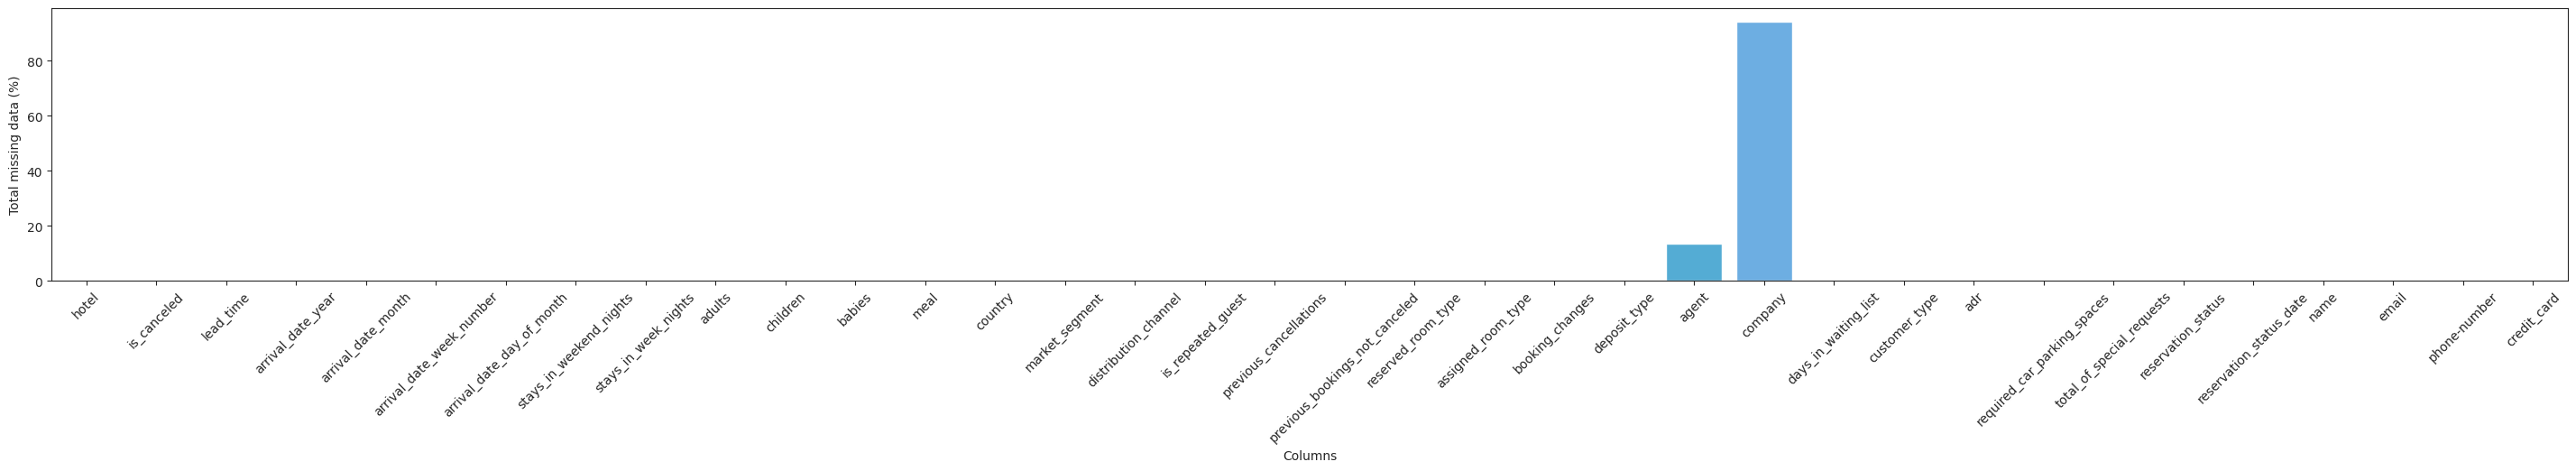

In [6]:
# Calculating number of missing data by percentage
missing_values = 100*(df.isnull().sum() / len(df));

# Creating a DataFrame for the columns
missing_values = missing_values.to_frame();
missing_values.columns = ['Total missing data'];
missing_values.index.names = ['Columns'];
missing_values = missing_values.reset_index();

# Displaying the results in a bar-plot using Seaborn library
plt.figure(figsize=(36,4), dpi=100);
sns.set_style(style='ticks');
sns.barplot(data=missing_values, x='Columns', y='Total missing data');
plt.xticks(rotation = 45);
plt.ylabel('Total missing data (%)');

# Q5 - Drop 'company' column from DataFrame.

In [7]:
# Drop the desired column
df.drop('company',axis=1, inplace=True);

# Display the list of dataset's column
df.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

Using the 'drop()' function, the specified column (at here is 'company' column) will be removed. To remove it permanently, I used the 'inplace=true' attribute in the 'drop()' function. <br>
I added 'columns' attribute to display the columns as an array while the company column is removed. Also, I added 'tolist()' function to display the columns as a list.

# Q6 - Which country have the most passengers? Define the top 5 countries.

In [8]:
df['total_passengers'] = (df['adults'] + df['children'] + df['babies']) - df['is_canceled'];

df_passengers = df[['country','adults','children','babies','is_canceled','total_passengers']].groupby('country').sum().nlargest(5,'total_passengers');
df_passengers

,adults,children,babies,is_canceled,total_passengers
country,,,,,
PRT,86131,3468.0,437,27519,62512.0
GBR,23223,1253.0,92,2453,22115.0
FRA,20291,1211.0,77,1934,19645.0
ESP,16615,1412.0,126,2177,15976.0
DEU,13703,477.0,18,1218,12980.0


The question wants the top 5 contries with the most total passengers. <br>
At first, I summed the 'adults', 'children' and 'babies' columns together. Since some passengers in the dataset had canceled their tickets, the 'is_canceled' column should be subtracted from the summation. The calculation's result is stored in a new column named 'total_passengers'.

Then, beside displaying the results, they need to be grouped by the 'country' column and sum the columns with the 'sum()' function.

If I use the 'max()' function to display the top 5 contries, since I displayed the dataframe with more than 1 column, it doesn't know which column should be sorted by. In this case, I used the 'nlargest()' function to tell it I want the *top 5* records sorted by the *'total_passengers'* column.

Here we go. The top 5 countries with the most total passengers are displayed in a dataframe.

To view the results in a plot, expand the cell below.

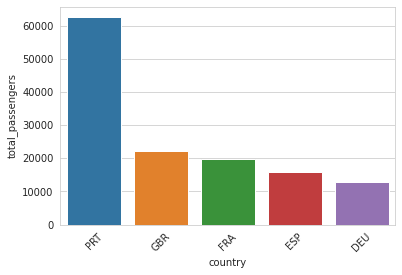

In [9]:
# Displaying in a bar plot
sns.set_style(style='whitegrid');
sns.barplot(data=df_passengers.reset_index(), x='country', y='total_passengers');
plt.xticks(rotation=45);

# Q7 - Define the name of the passenger who have the maximum average daily rate (ADR). How much is its price?

In [10]:
name = df['name'][df['adr'].idxmax()];
price = df['adr'].max();

pd.DataFrame({
    'Name': name,
    'Price': price
},index=['Max(ADR)'])

,Name,Price
Max(ADR),Daniel Walter,5400.0


The question wants to know who have the maximum ADR. For this, I first searched for the location of the maximum ADR using 'idxmax()' function. Then, I searched for the name of that passenger in the 'name' column and stored it in the 'name' variable. <br>
The question also wants to know the price. For this case, I found the maximum ADR and displayed it as the price.

At last, I represented the results in a dataframe.

# Q8 - Average of total ADRs with 2 decimals.

In [11]:
df['adr'].mean().round(2)

101.83

# Q9 - Define the average of number of nights stayed.

In [12]:
df['total_stays_in_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights'];

df['total_stays_in_nights'].mean().round(2)

3.43

At first, to get the total number of stays in nights, I summed *stays_in_week_nights* and *stays_in_weekend_nights* columns together. <br>
To get the average of it, the *mean()* function is used. Also, to round the number to 2 decimals, I used the *round()* function.

To view the total stays in nights classified by hotels, expand the cell below. Because the plot was too big, I limited it to the numbers with most stays using *xlim()* function.

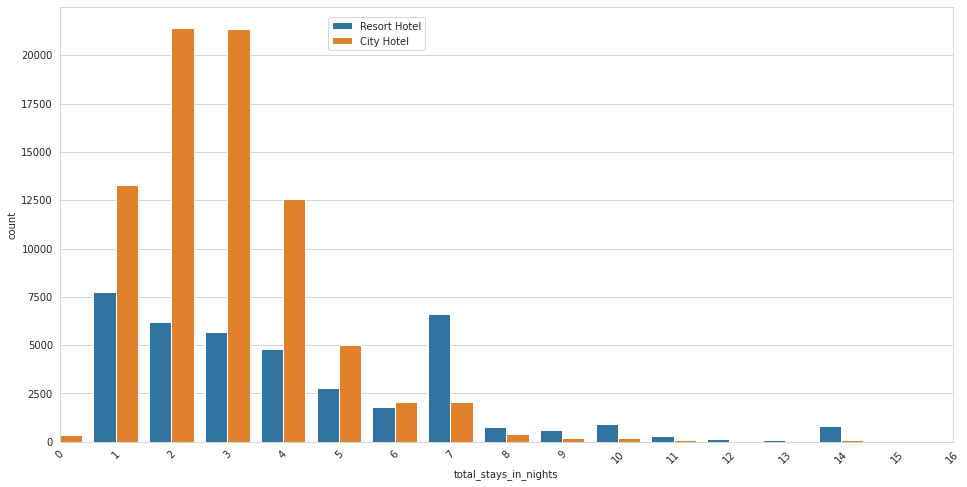

In [13]:
plt.figure(figsize=(16,8));
sns.countplot(data=df, x='total_stays_in_nights', hue='hotel');
plt.xticks(rotation=45);

plt.xlim(0,16);
plt.legend(loc=(0.3,0.9));

# Q10 - Define the name and e-mail of people who had 5 special requests.

In [14]:
df[df['total_of_special_requests'] == 5][['name','email']]

,name,email
7860,Amanda Harper,Amanda.H66@yahoo.com
11125,Laura Sanders,Sanders_Laura@hotmail.com
14596,Tommy Ortiz,Tommy_O@hotmail.com
14921,Gilbert Miller,Miller.Gilbert@aol.com
14922,Timothy Torres,TTorres@protonmail.com
24630,Jennifer Weaver,Jennifer_W@aol.com
27288,Crystal Horton,Crystal.H@mail.com
27477,Brittney Burke,Burke_Brittney16@att.com
29906,Cynthia Cabrera,Cabrera.Cynthia@xfinity.com
29949,Sarah Floyd,Sarah_F@gmail.com


# Q11 - Which first names have the most frequency of last name? Define 5 most frequent family.

In [15]:
lastname_count = df['name'].apply(lambda lname:lname.split()[1]).value_counts().head().to_frame('value_counts');
lastname_count

,value_counts
Smith,2510
Johnson,1998
Williams,1628
Jones,1441
Brown,1433


In order to get the last names, at the first step, we should <u>split</u> the names via *split()* function. Hopefully, the prefixes (Such as Mr, Mrs, Dr, etc) are at the end of the names. But I don't know if anyone's name is in two parts or not (E.g. 'Mohammad Ali', a Persian name). If any exists, I don't know what to do. So, lets assume that the first and last names are in single part. :-)

To split each name in the column, I created a function and applied it via *apply()* function.

Since the indexes start from 0, then:
* 0 => First names
* 1 => Last names
* 2 => Prefixes

So, the index 1 will be choosed to have the last names.

At last, we should count the last names via *value_counts()* function, i.e. how much of each last name exists. <br>
To view the results in a bar plot, expand the cell below.

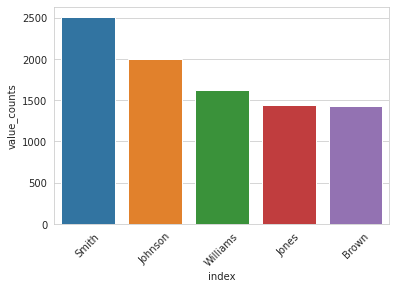

In [16]:
# Displaying via bar plot
sns.barplot(data=lastname_count.reset_index(), y='value_counts', x='index');
plt.xticks(rotation=45);

# Q12 - Define the people whom reserved a hotel with most number of babies and children.

In [17]:
df['total_babies_and_children'] = df['babies'] + df['children'];

df[['name','email','phone-number','total_babies_and_children']].loc[df['total_babies_and_children'].idxmax()].to_frame('Content')

,Content
name,Jamie Ramirez
email,Ramirez_Jamie22@aol.com
phone-number,268-823-5667
total_babies_and_children,10.0


Since the question wants the people with <u>most number of *babies* and *children*</u>, I summed the two columns *babies* and *children* together and stored them in a new column named *total_babies_and_children*.

To show the people's informations, the index number of their record is needed. So, I used the *idxmax()* function to find the maximum result and give its index number. <br>
I putted the above result in *loc()* function to locate the specified record and then, display its other informations.

# Q13 - Define the phone number of regions which had the most reservations.

In [18]:
df['phone-number'].apply(lambda phone_no:phone_no[:3]).value_counts().nlargest(3).to_frame('Value counts')

,Value counts
799,168
185,167
541,166


In order to get the regions national phone code, we need the first 3 digits of each number. To do this, I'd got the first 3 digits of each number via an inline function (lambda). Then, to count them, I used *value_counts()* function. <br>
Since the dataset's records are a lot, I just wanted to display the top 3 national phone codes with most reservations via *nlargest()* function.

The *to_frame()* function is for displaying the results in a dataframe. The string in the function, is the name of the column.